<a href="https://colab.research.google.com/github/joshitha12/NNDL/blob/main/assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X = pressure (lb/sq in) of liquid nitrogen
Y = weight in pounds of liquid nitrogen

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
df = pd.read_csv("/content/drive/MyDrive/datasets/pressureweight.csv")
df.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [18]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [20]:
#outliers
z = np.abs(stats.zscore(df))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


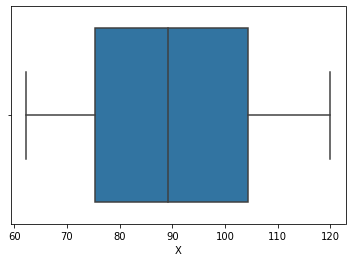

In [21]:
sns.boxplot(x=df['X'])

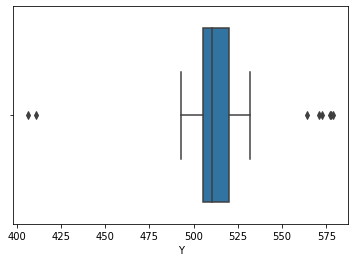

In [22]:
sns.boxplot(x=df['Y'])

In [23]:
f_data = df[(z < 3).all(axis=1)]
f_data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [24]:
if(len(df) == len(f_data)):
    print('No outliners')

No outliners


In [25]:
#normalization
data = df.copy()
data = (data - data.min())/(data.max() - data.min())
data.head()

,X,Y
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [26]:
#splitting data
train_data,test_data = train_test_split(data,test_size=0.1,random_state=2)
print(len(train_data))
train_data.head()

27


,X,Y
9,0.489619,0.584061
21,0.474048,0.617219
19,0.747405,0.606166
23,0.676471,0.502036
6,0.910035,0.727167


In [27]:
x = np.array(train_data['X'])
y = np.array(train_data['Y'])

In [28]:
eta=0.1 #Learning rate
max_iters=100 #Maximum iterations
err=[]
ns=len(x)#Batch Size
m=-1.0
c=1.0
for i in range(0,max_iters):
  error=0
  gradm=0
  gradc=0
  for j in range(0,ns):
    error +=  ((y[j] - (m * x[j]) - c))**2
    #Partial differentiation of error function with respect to m and c
    gradm = gradm+((-1.0)*((y[j] - m*x[j] -c)*x[j]))
    gradc = gradc+((-1.0)*(y[j] - m*x[j] -c))
  gradm = gradm/ns
  gradc = gradc/ns
  dm = (-1.0)*eta*gradm
  dc = (-1.0)*eta*gradc  
  #update variable 
  m = m + dm
  m = round(m, 2) 
  c = c + dc
  c = round(c, 2)
  error = (1/(2*len(train_data['X'])))*(error)
  err.append(error)
print(m, c)
print(f'minimum value obtained at m = {m} ,c ={c} for given function')

-0.82 1.05
minimum value obtained at m = -0.82 ,c =1.05 for given function


In [29]:
#MSE of traning data
train_data_pred =  m*train_data['X'] + c
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_data['Y'],train_data_pred)
print("Mean Square Error(MSE) of training data : ",mse)
print("Root Mean Square Error(RMSE) training data:",mse**0.5)

Mean Square Error(MSE) of training data :  0.08716578016293013
Root Mean Square Error(RMSE) training data: 0.29523851402371293


Text(0.5, 1.0, 'predicted data vs actual data')

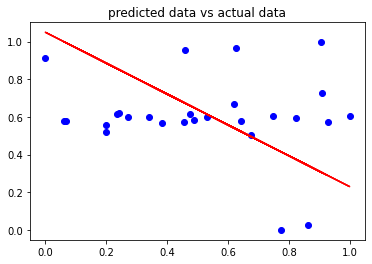

In [30]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),'red')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),color='blue')
plt.title('predicted data vs actual data')

In [31]:
#MSE of test data
test_data_pred = m *test_data['X'] + c
mse2 = mean_squared_error(test_data['Y'],test_data_pred)
print("Mean Square Error(MSE) of testing data : ",mse)
print("Root Mean Square Error(RMSE) testing data:",mse**0.5)

Mean Square Error(MSE) of testing data :  0.08716578016293013
Root Mean Square Error(RMSE) testing data: 0.29523851402371293


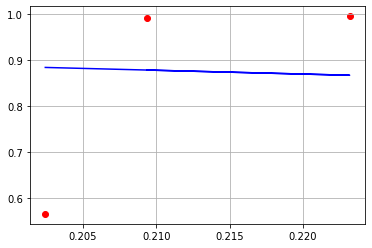

In [32]:
plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['X'],test_data_pred,'blue')
plt.grid()

In [33]:
#output prediction
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()
x = float(input("enter pressure of liquid nitrogen value :"))
x1=x
x = (x - x_min)/(x_max - x_min)
y = m*x + c
y = y*(y_max - y_min) + y_min
print(f"weight of liquid nitrogen based on its pressure {x1} is : {y}")

enter pressure of liquid nitrogen value :74.3
weight of liquid nitrogen based on its pressure 74.3 is : 557.686491349481
